# Data Science and Business Analytics

The Sparks Foundation GRIP August 2021

**Author: Joshua Paul**

# Task 3: Exploratory Data Analysis - Retail

In ths task we perform Exploratory Data Analysis on dataset ‘SampleSuperstore’

We try to find weak areas where we can work to make more profit

**Importing Libraries**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [121]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [123]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [124]:
#sns.histplot(data=df,x='Profit',y='Sales')
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


**Check unique values**

In [125]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**We can remove Country and Postal Code**

In [126]:
df.drop('Country',axis=1,inplace=True)
df.drop('Postal Code',axis=1,inplace=True)

In [127]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [128]:
df.groupby('Category').mean()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,349.834887,3.785007,0.173923,8.699327
Office Supplies,119.324101,3.801195,0.157285,20.327050
Technology,452.709276,3.756903,0.132323,78.752002


In [129]:
df.groupby('Sub-Category').mean()

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,215.974604,3.840000,0.078452,54.111788
Appliances,230.755710,3.710300,0.166524,38.922758
Art,34.068834,3.768844,0.074874,8.200737
Binders,133.560560,3.922521,0.372292,19.843574
Bookcases,503.859633,3.807018,0.211140,-15.230509
Chairs,532.332420,3.818476,0.170178,43.095894
Copiers,2198.941618,3.441176,0.161765,817.909190
Envelopes,64.867724,3.566929,0.080315,27.418019
Fasteners,13.936774,4.211982,0.082028,4.375660


# Plotting

<AxesSubplot:>

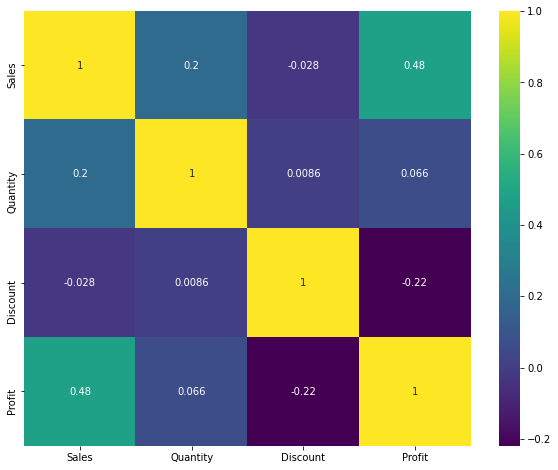

In [186]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),cmap='viridis',annot=True)

**We observe that sales is highly correlated to profit**

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

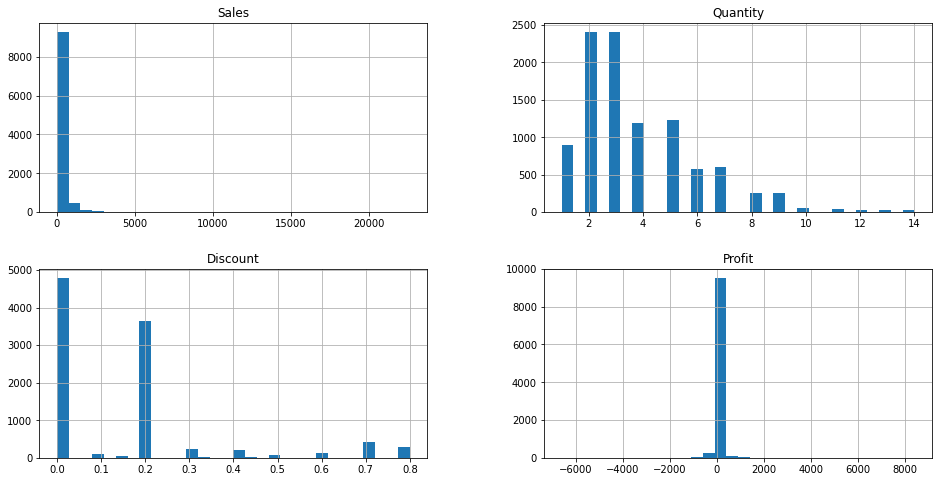

In [194]:
df.hist(figsize=(16,8),bins=30)

**We see that most products have either no discount or have 20% discount**

**From the quantity graph we observe that most people tend to buy 2 or 3 items**

Text(0.5, 1.0, 'Category vs Sales')

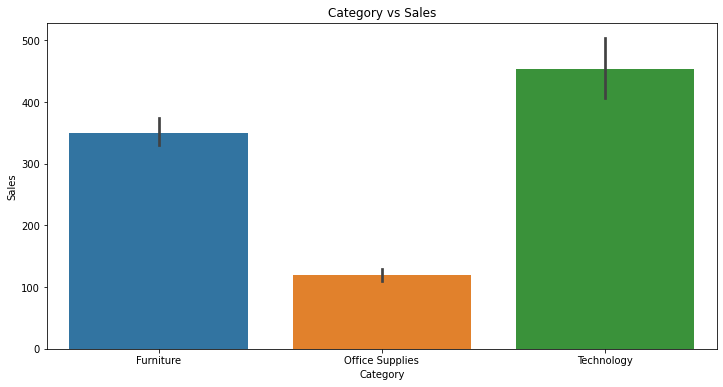

In [196]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='Sales',x='Category')
plt.title('Category vs Sales')

**We can see that technology has the most sales**

Text(0.5, 1.0, 'Category vs Profit')

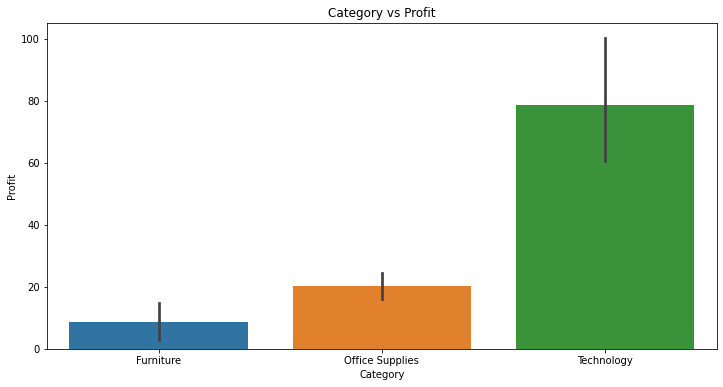

In [197]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='Profit',x='Category')
plt.title('Category vs Profit')

**Tech goods make the most profit. Furniture makes the least amount of profit but is sold at a significant amount.**

Text(0.5, 1.0, 'Comparing Sub-Category with Sales')

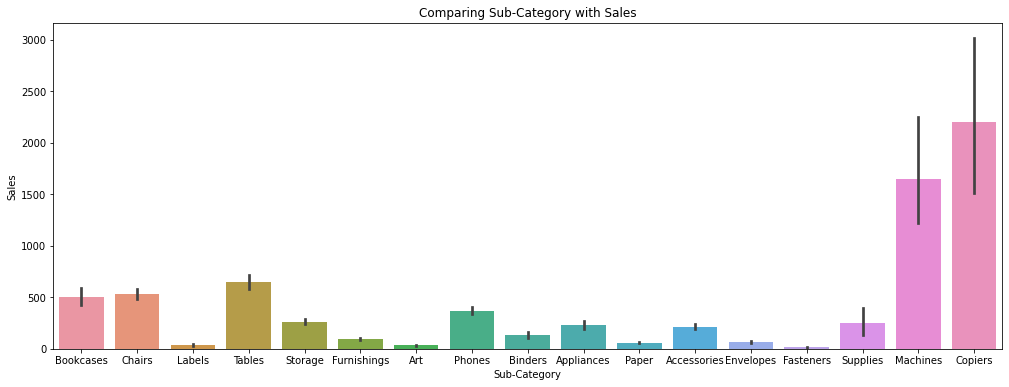

In [201]:
plt.figure(figsize=(17,6))
sns.barplot(data=df,y='Sales',x='Sub-Category')
plt.title('Comparing Sub-Category with Sales')

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

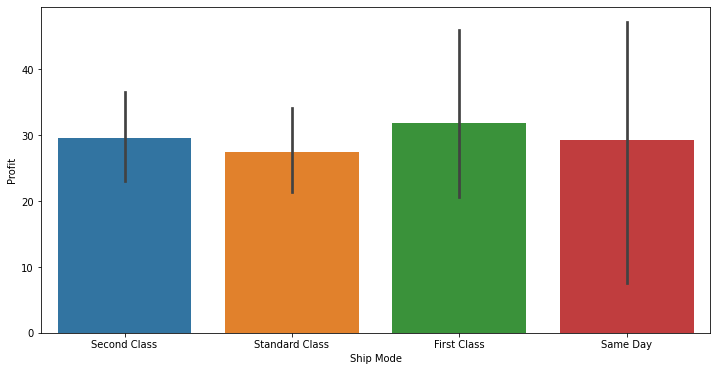

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='Profit',x='Ship Mode')

**Though first class shipping makes more profit than other shipping modes, the difference is not that significant**

Text(0.5, 1.0, 'Segment vs Profit')

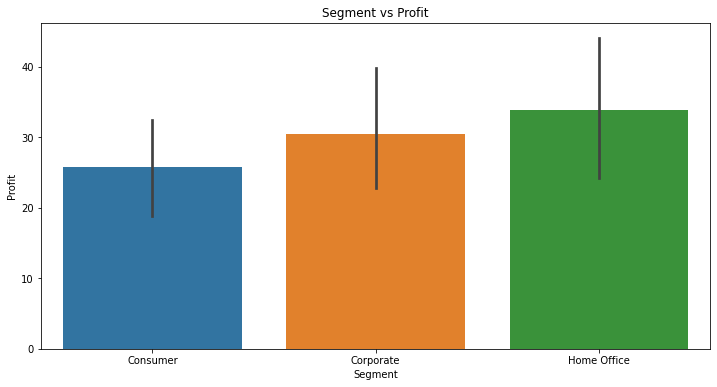

In [170]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y='Profit',x='Segment')
plt.title('Segment vs Profit')

<Figure size 1152x432 with 0 Axes>

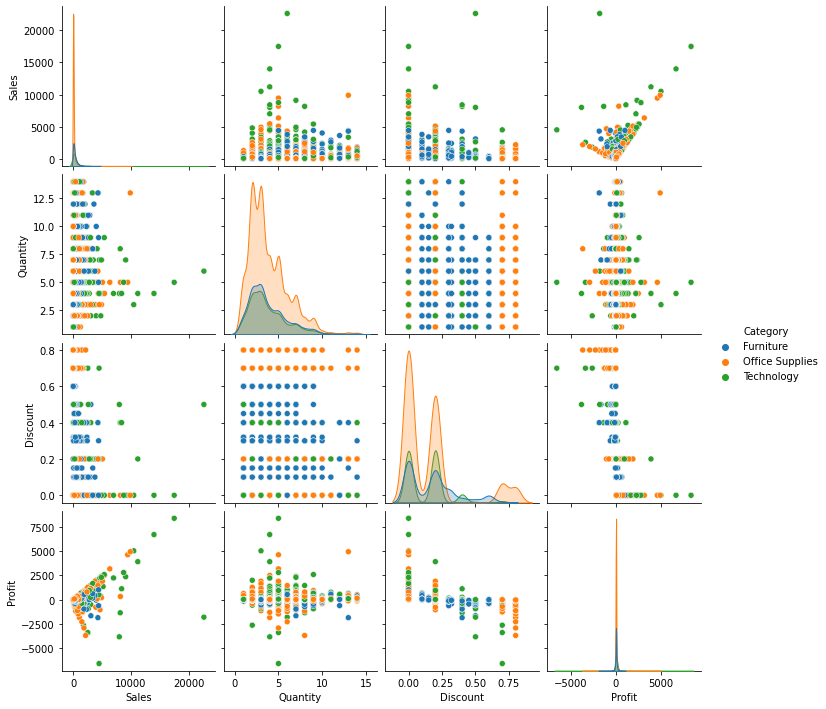

In [136]:
plt.figure(figsize=(16,6))
sns.pairplot(data=df,hue='Category')

# Visualizing the effect of discount on sales and profit

Text(0.5, 1.0, 'Discount vs Profit')

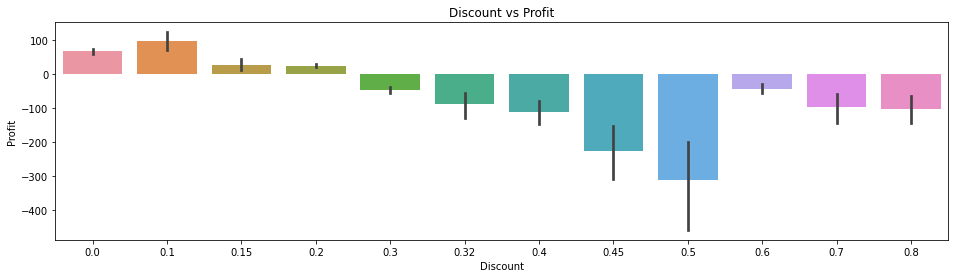

In [181]:
plt.figure(figsize=(16,4))
sns.barplot(data=df,y='Profit',x='Discount')
plt.title('Discount vs Profit')

**Discount should be 20% or less to make profit**

Text(0.5, 1.0, 'Discount vs Profit')

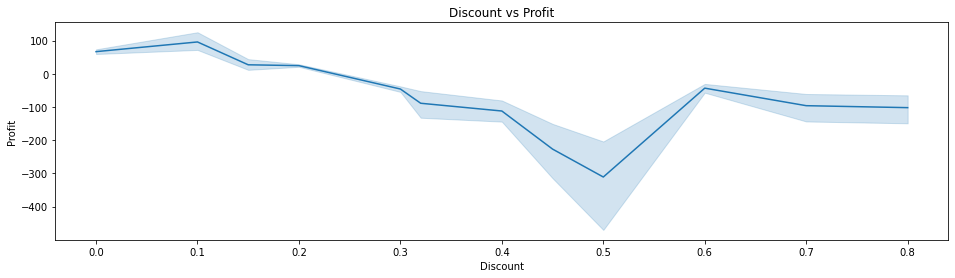

In [182]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df,y='Profit',x='Discount')
plt.title('Discount vs Profit')

Text(0.5, 1.0, 'Discount vs Sales')

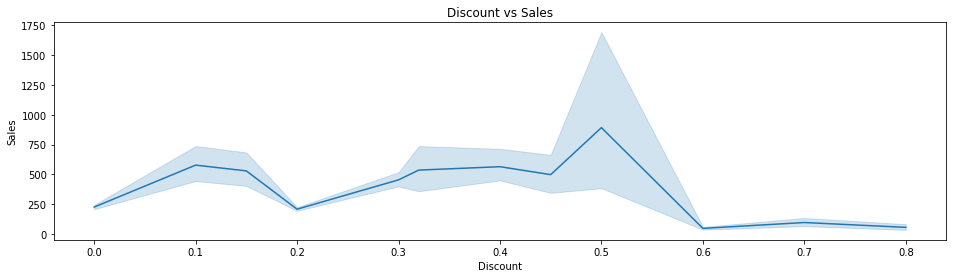

In [184]:
plt.figure(figsize=(16,4))
sns.lineplot(data=df,y='Sales',x='Discount')
plt.title('Discount vs Sales')

**Profit is lowest and sales are highest when discount is 50% so, overall loss is greater when discount is 50%**

**Both sales and profit are high when discount is 10% so, it is more profitable to give a discount of 10%**

**Giving a discount of 50% is a good strategy to make people buy products and once customers like the product, the discount can be lowered to around 10%**

Sub-Category
Accessories    AxesSubplot(0.125,0.125;0.775x0.755)
Appliances     AxesSubplot(0.125,0.125;0.775x0.755)
Art            AxesSubplot(0.125,0.125;0.775x0.755)
Binders        AxesSubplot(0.125,0.125;0.775x0.755)
Bookcases      AxesSubplot(0.125,0.125;0.775x0.755)
Chairs         AxesSubplot(0.125,0.125;0.775x0.755)
Copiers        AxesSubplot(0.125,0.125;0.775x0.755)
Envelopes      AxesSubplot(0.125,0.125;0.775x0.755)
Fasteners      AxesSubplot(0.125,0.125;0.775x0.755)
Furnishings    AxesSubplot(0.125,0.125;0.775x0.755)
Labels         AxesSubplot(0.125,0.125;0.775x0.755)
Machines       AxesSubplot(0.125,0.125;0.775x0.755)
Paper          AxesSubplot(0.125,0.125;0.775x0.755)
Phones         AxesSubplot(0.125,0.125;0.775x0.755)
Storage        AxesSubplot(0.125,0.125;0.775x0.755)
Supplies       AxesSubplot(0.125,0.125;0.775x0.755)
Tables         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

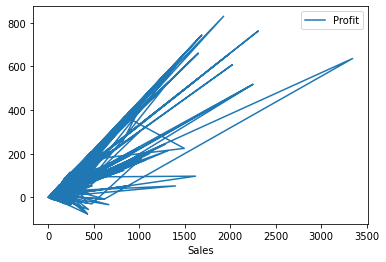

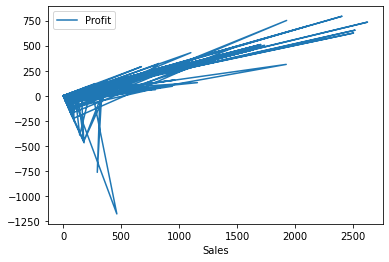

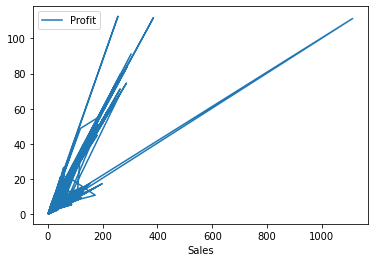

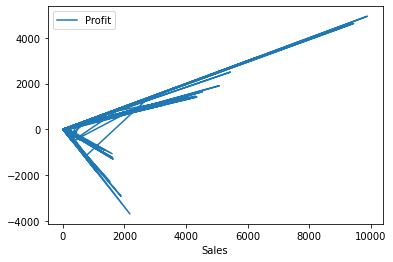

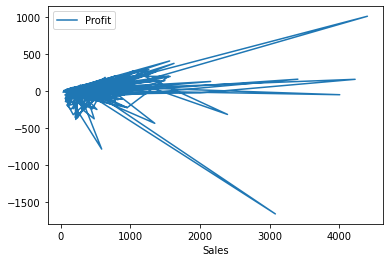

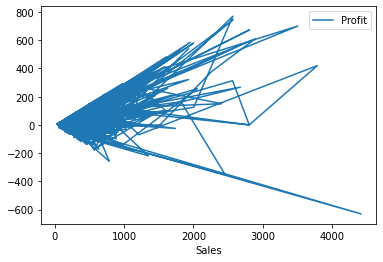

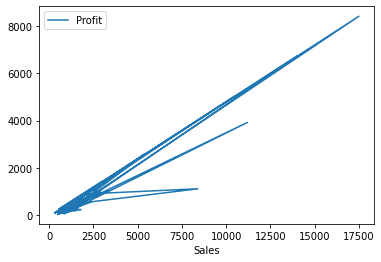

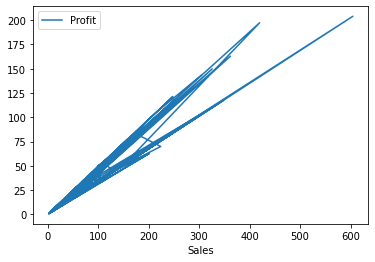

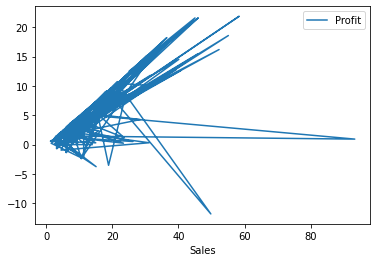

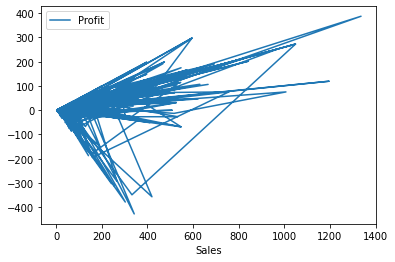

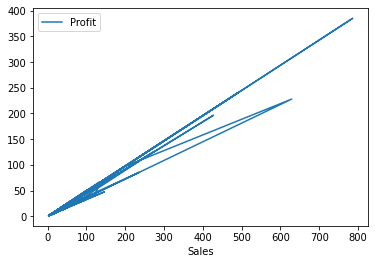

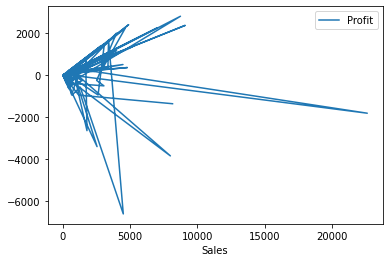

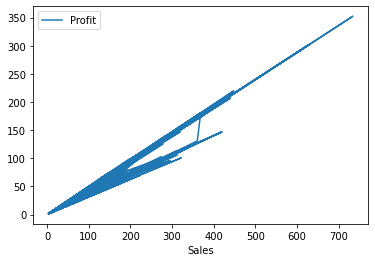

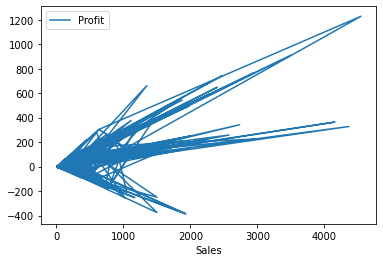

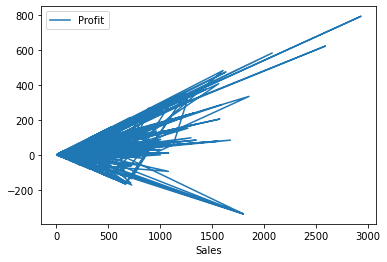

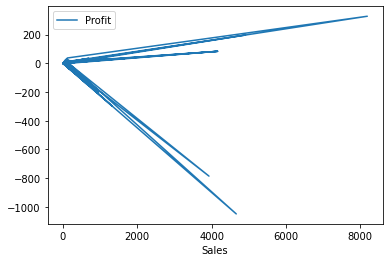

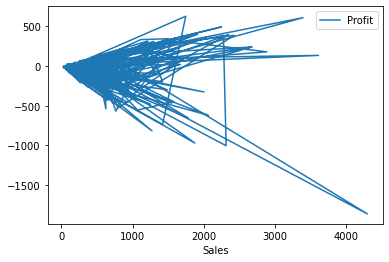

In [140]:
#df.groupby('Category').plot(x='Profit',y='Sales')
df.groupby('Sub-Category').plot(x='Sales',y='Profit')

Text(0.5, 0, 'Sub-Category')

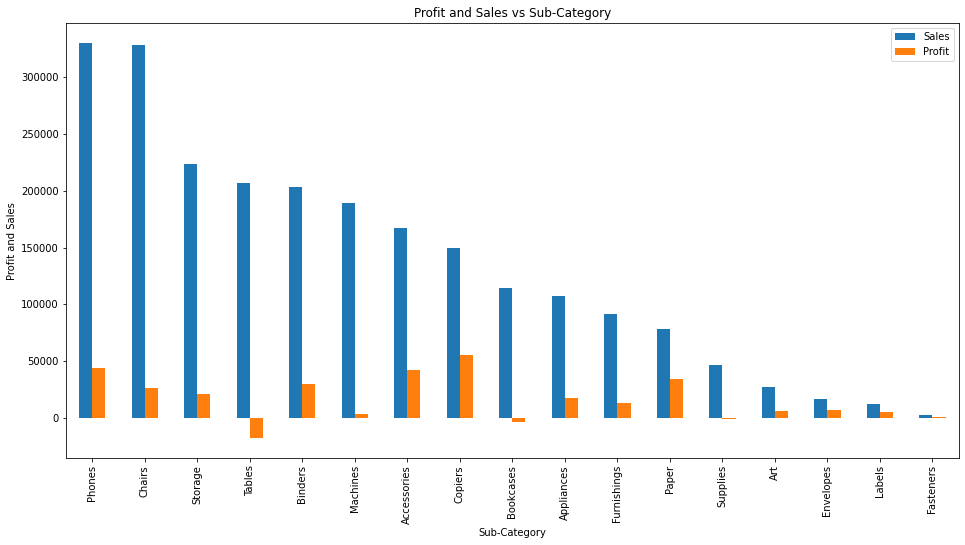

In [142]:
st=df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
st.plot.bar(figsize=(16,8))
plt.title('Profit and Sales vs Sub-Category')
plt.ylabel('Profit and Sales')
plt.xlabel('Sub-Category')

**Phones and Chairs are sold the most but, Copiers and Accessories make more profit with less sales**

Text(0.5, 0, 'Region')

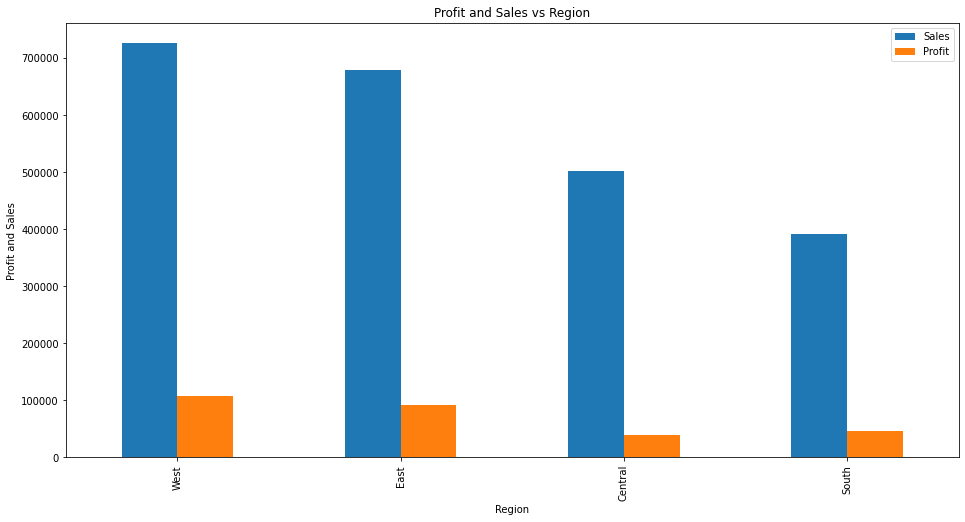

In [188]:
st=df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
st.plot.bar(figsize=(16,8))
plt.title('Profit and Sales vs Region')
plt.ylabel('Profit and Sales')
plt.xlabel('Region')

**West and East Regions have highest Sales as well as Profit**

# Importing necessary libraries for Geographical Plotting

In [144]:
from plotly.offline import iplot,plot,download_plotlyjs,init_notebook_mode
import plotly.graph_objs as go 

In [145]:
import cufflinks as cf

In [146]:
init_notebook_mode(connected=True)

In [147]:
cf.go_offline()

In [148]:
df.groupby('State').describe()

Sales                                                  \
                       count         mean          std       min         25%   
State                                                                          
Alabama                 61.0   319.846557   545.761807     3.620    19.56000   
Arizona                224.0   157.508933   249.710692     1.408    15.16400   
Arkansas                60.0   194.635500   316.405669     4.300    19.77750   
California            2001.0   228.729451   491.005264     0.990    19.76000   
Colorado               182.0   176.418231   324.415072     1.080    15.16000   
Connecticut             82.0   163.223866   251.732268     3.520    14.71250   
Delaware                96.0   285.948635  1112.818485     3.380    19.95000   
District of Columbia    10.0   286.502000   547.419707     9.640    20.26500   
Florida                383.0   233.612815  1205.490630     1.167    11.95200   
Georgia                184.0   266.825217   637.796228     1.780    19.23000   
Idaho                   21.0   208.689810   282.061093     3.304    21.31200   
Illinois               492.0   162.939230   317.122940     0.836    11.20100   
Indiana                149.0   359.431946  1481.538652     1.980    24.56000   
Iowa                    30.0   152.658667   326.637475     5.400    13.83750   
Kansas                  24.0   121.429583   124.606356     5.760    20.65500   
Kentucky               139.0   263.250000   472.818538     2.610    24.10000   
Louisiana               42.0   219.453095   365.264153     3.890    21.06000   
Maine                    8.0   158.816250   146.676370     8.260    58.44500   
Maryland               105.0   225.766886   396.914182     1.640    25.02000   
Massachusetts          135.0   212.106919   336.924698     3.150    22.32500   
Michigan               255.0   299.096525   826.126521     2.200    22.69000   
Minnesota               89.0   335.541011  1070.678744     3.750    22.00000   
Mississippi             53.0   203.232830   365.834352     6.160    30.44000   
Missouri                66.0   336.441667   830.866752     7.640    25.15500   
Montana                 15.0   372.623467   784.412796     6.096    21.83000   
Nebraska                38.0   196.445526   459.444553     5.040    17.61750   
Nevada                  39.0   428.951333   881.267531     3.640    31.74000   
New Hampshire           27.0   270.093481   475.181739    14.820    29.94500   
New Jersey             130.0   275.110092   890.520072     3.760    19.89250   
New Mexico              37.0   129.284378   190.093868     4.170    16.68000   
New York              1128.0   275.599531   691.716475     1.240    20.02750   
North Carolina         249.0   223.305880   648.754454     1.752    15.98400   
North Dakota             7.0   131.415714   256.602857     2.480    14.45500   
Ohio                   469.0   166.861697   353.261659     1.448    14.48000   
Oklahoma                66.0   298.233182   431.874240     3.520    20.61000   
Oregon                 124.0   140.573790   215.028430     1.080    16.59975   
Pennsylvania           587.0   198.487077   531.058157     0.852    12.67200   
Rhode Island            56.0   404.070643   853.179916     2.220    34.77000   
South Carolina          42.0   201.945476   318.462333     6.460    23.96500   
South Dakota            12.0   109.630000   148.257140     2.970    13.63500   
Tennessee              183.0   167.551219   360.678518     1.584    12.22800   
Texas                  985.0   172.779742   424.447771     0.444    10.82400   
Utah                    53.0   211.699170   378.723382     4.960    21.36000   
Vermont                 11.0   811.760909  1309.310745     2.040    46.10000   
Virginia               224.0   315.342500   792.001296     2.840    27.49500   
Washington             506.0   273.994605   777.244483     1.344    20.66350   
West Virginia            4.0   302.456000   313.508627     6.240    63.36000   
Wisconsin              

**Getting State codes from State names for geographical plotting**

In [149]:
state_codes = {
    'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}
df['State Code']=df['State'].apply(lambda x:state_codes[x])

In [150]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,State Code
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL


# Checking Sales in different States 

In [210]:
df0=df[['Sales','Profit','State Code']].groupby('State Code').mean()

In [286]:
data=dict(type='choropleth',
         locations=df0.index,
         locationmode='USA-states',
         colorscale='solar',
         z=df0.Sales,
         colorbar={'title':'Sales'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df0.Sales)
layout=dict(title='Sales',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))

In [287]:
choromap=go.Figure(data=[data],layout=layout)

**Total average sales in different states**

In [288]:
iplot(choromap)

**We see that average sales are pretty much the same in most states except in Wyoming and Vermont where the sales are higher.**

In [238]:
df1=df[df['Category']=='Furniture']
df1=df1[['Sales','Profit','State Code']].groupby('State Code').mean()
df2=df[df['Category']=='Office Supplies']
df2=df2[['Sales','Profit','State Code']].groupby('State Code').mean()
df3=df[df['Category']=='Technology']
df3=df3[['Sales','Profit','State Code']].groupby('State Code').mean()

In [289]:
data=dict(type='choropleth',
         locations=df1.index,
         locationmode='USA-states',
         colorscale='Reds',
         z=df1['Sales'],
         colorbar={'title':'Sales'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df1['Sales'])
layout=dict(title='Sales',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))

In [290]:
choromap=go.Figure(data=[data],layout=layout)

**Average furniture sales in different states**

In [291]:
iplot(choromap)

**Vermont and Wyoming have the highest average sales**

**There is a significant amount of variation in furniture sales in different states so, we can make good profit by marketing furniture to the states with higher furniture sales. Also there are no sales in North Dakota**

In [250]:
data=dict(type='choropleth',
         locations=df2.index,
         locationmode='USA-states',
         colorscale='Viridis',
         z=df2['Sales'],
         colorbar={'title':'Sales'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df2['Sales'])
layout=dict(title='Sales',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))

In [251]:
choromap=go.Figure(data=[data],layout=layout)

**Average office supply sales in different states**

In [252]:
iplot(choromap)

**Office supply sales are pretty consistent in almost all states except Wyoming, where there were no sales. It would be better to focus other states when selling office supplies**

In [260]:
data=dict(type='choropleth',
         locations=df3.index,
         locationmode='USA-states',
         colorscale='plasma',
         z=df3['Sales'],
         colorbar={'title':'Sales'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df3['Sales'])
layout=dict(title='Sales',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))

In [261]:
choromap=go.Figure(data=[data],layout=layout)

**Average Technology sales in different states**

In [262]:
iplot(choromap)

**In Wyoming,North Dakota and West Virginia there are no technology sales so, other states could be prioritized when marketing technology related goods**

In [264]:
df4=df[['Sales','Profit','State Code']].groupby('State Code').sum()

In [266]:
data=dict(type='choropleth',
         locations=df4.index,
         locationmode='USA-states',
         colorscale='thermal',
         z=df4.Sales,
         colorbar={'title':'Sales'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df4.Sales)
layout=dict(title='Sales',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))
choromap=go.Figure(data=[data],layout=layout)

**Total amount of sales in each state**

In [267]:
iplot(choromap)

**California and New York have the highest total sales**

In [ ]:
df5=df[['Sales','Profit','State Code']].groupby('State Code').sum()

In [294]:
data=dict(type='choropleth',
         locations=df4.index,
         locationmode='USA-states',
         colorscale='thermal',
         z=df4['Profit'],
         colorbar={'title':'Profit'},
         marker = dict(line = dict(color = 'rgb(12,12,12)',width = 1)), 
         text=df4.Sales)
layout=dict(title='Profit',
           geo=dict(scope='usa',lakecolor='rgb(85,173,240)',
                                        showlakes=True))
choromap=go.Figure(data=[data],layout=layout)

In [295]:
iplot(choromap)

**We observe that in most cases, the states with higher sales tend to have higher profit**

**In a few states such as Texas and Pennsylvania the profits are negative even though they have high sales**

**By this we can conclude that the factors that have the most effect on profit are sales and discount**

**Higher sales will multiply either profit or loss**

**High discounts should be used as a marketing strategy to make people use your product and once people start using it, discounts should be lowered to make profit**